In [17]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                  array_to_img, img_to_array, 
                                                  load_img) 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
import pathlib
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, Xception, InceptionV3
from tensorflow.keras.optimizers import Nadam, Adam
from tensorflow.keras.utils import plot_model


from src.helper_functions import *
from src.build_models import *

from datetime import datetime
import datetime
import time
from tensorflow.math import confusion_matrix

In [3]:
train_generator, validation_generator, holdout_generator = create_data_gens(target_size=(229,229),train_dir = "../images/Images/train",  val_dir = '../images/Images/val', holdout_dir = '../images/Images/test', batch_size = 30)

Found 4164 images belonging to 25 classes.
Found 86 images belonging to 25 classes.
Found 99 images belonging to 25 classes.


In [5]:
model = load_model('models_and_weights/Xception_mod3.h5')
model.load_weights('models_and_weights/weights_Xception_mod3.h5')

In [10]:
pred = model.predict(holdout_generator)

In [55]:
def get_real_pred(predictions, holdout_generator):
    predicted_class_indices = np.argmax(pred,axis=1)
    labels = holdout_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    real_classes = holdout_generator.classes
    real_labels = [labels[k] for k in real_classes]
    predictions = ['-'.join(lab.split('-')[1:]) for lab in predictions]
    real_labels = ['-'.join(lab.split('-')[1:]) for lab in real_labels]

    return predictions, real_labels


def find_missclass_indx(real_labels, prediction_labels):
    incorrect_index = []
    for ind, (i, j) in enumerate(zip(real_labels, prediction_labels)):
      if i != j:
        print('True- {}, \nPred- {}\n'.format(i,j))
        incorrect_index.append(ind)
    return incorrect_index


def plot_missclass(holdout_generator, predictions):
    x,y = holdout_generator.next()
    prediction_labels, real_labels = get_real_pred(predictions, holdout_generator)
    
    incorrect_index = find_missclass_indx(real_labels, prediction_labels)
    fig, axs = plt.subplots(4,2, figsize = (20,20))
    ax = axs.flatten()
    for i, ind in enumerate(incorrect_index):
        rl = real_labels[ind]
        pl = prediction_labels[ind]
        image = x[ind]
        ax[i].set_title('Actual: {}, \n Predicted: {}'.format(rl, pl))
        ax[i].imshow(image)
        ax[i].axis('off')

In [ ]:
metrics = model.evaluate(holdout_generator)

In [56]:
prediction_labels, real_labels = get_real_pred(pred, holdout_generator)

True- Chihuahua, 
Pred- Rhodesian_ridgeback

True- Pekinese, 
Pred- Japanese_spaniel

True- Labrador_retriever, 
Pred- English_setter

True- Labrador_retriever, 
Pred- Rhodesian_ridgeback

True- Doberman, 
Pred- Rhodesian_ridgeback

True- Great_Dane, 
Pred- whippet

True- Great_Dane, 
Pred- English_setter



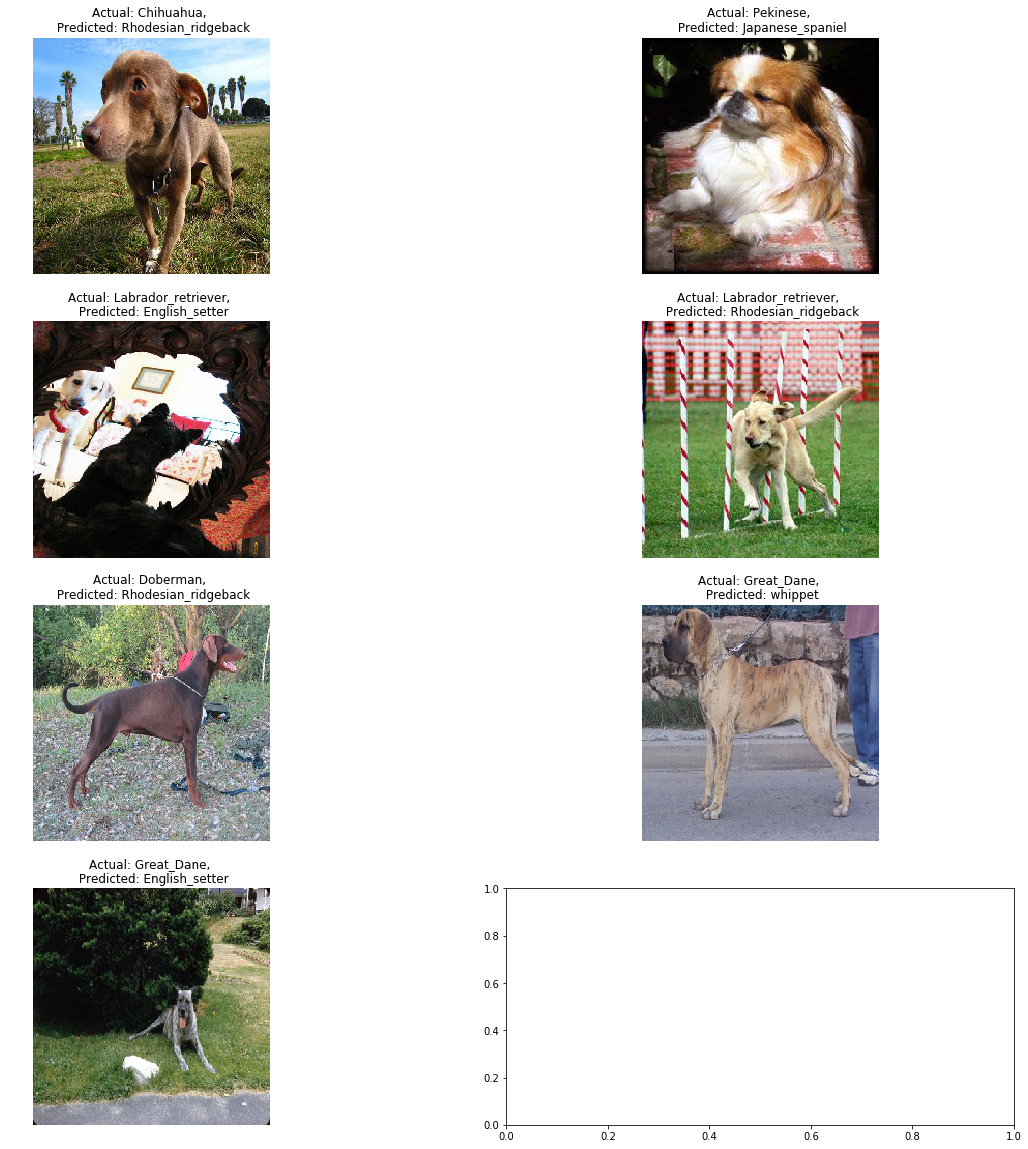

In [57]:
plot_missclass(holdout_generator, pred)

1/1 [==============================] - 23s 23s/step - loss: 1.0337 - accuracy: 0.9293 - top_k_categorical_accuracy: 0.9798


[1.0336986780166626, 0.9292929, 0.97979796]

In [5]:
Xception_transfer_model.save_weights('weights_X150.h5')

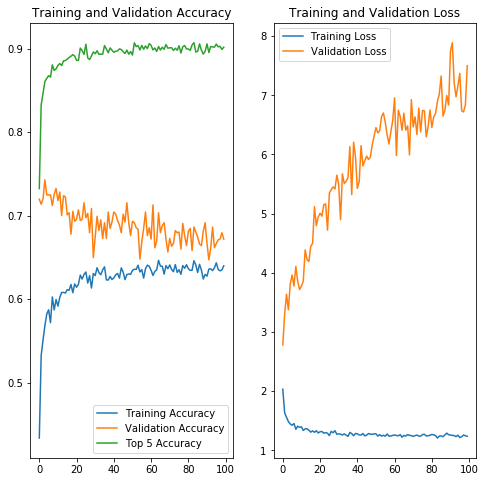

In [6]:
# plot_acc_loss_per_epoch(Xception_history, epochs = 100, file_name='100_Xception290.png')

In [7]:
change_trainable_layers(Xception_transfer_model, 129)

Xception_transfer_model.compile(optimizer=Nadam(lr=0.01), loss=['categorical_crossentropy'], metrics=['accuracy', 'top_k_categorical_accuracy'])

Xception_history = Xception_transfer_model.fit(train_generator,
            steps_per_epoch=3034 // 15,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=650 // 16,
            verbose = 1)

Epoch 1/20
202/202 [==============================] - 721s 4s/step - loss: 1.9296 - accuracy: 0.4830 - top_k_categorical_accuracy: 0.7970 - val_loss: 10.1125 - val_accuracy: 0.6325 - val_top_k_categorical_accuracy: 0.8742
Epoch 2/20
202/202 [==============================] - 732s 4s/step - loss: 1.4464 - accuracy: 0.5659 - top_k_categorical_accuracy: 0.8658 - val_loss: 9.6823 - val_accuracy: 0.6128 - val_top_k_categorical_accuracy: 0.8542
Epoch 3/20
202/202 [==============================] - 710s 4s/step - loss: 1.3357 - accuracy: 0.6040 - top_k_categorical_accuracy: 0.8883 - val_loss: 10.5532 - val_accuracy: 0.5932 - val_top_k_categorical_accuracy: 0.8583
Epoch 4/20
202/202 [==============================] - 707s 4s/step - loss: 1.2032 - accuracy: 0.6388 - top_k_categorical_accuracy: 0.9017 - val_loss: 10.1329 - val_accuracy: 0.5795 - val_top_k_categorical_accuracy: 0.8592
Epoch 5/20
202/202 [==============================] - 987s 5s/step - loss: 1.1009 - accuracy: 0.6573 - top_k_cate

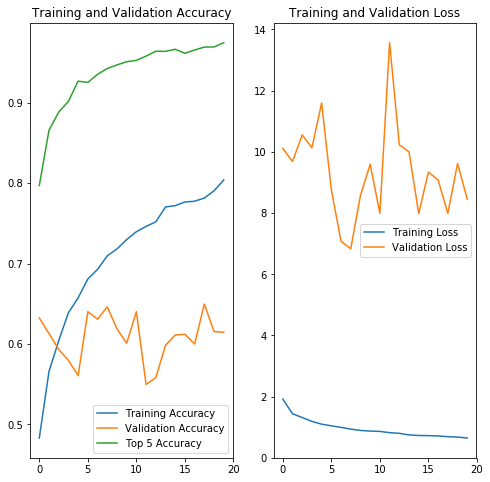

In [8]:
plot_acc_loss_per_epoch(Xception_history, epochs = 20, file_name='images/plus_20_Xception150.png')

In [ ]:
Xception_transfer_model.save('models_and_weights/plus_20_Xception_mod150.h5')
Xception_transfer_model.save_weights('models_and_weights/plus_20_weights_X150.h5')

In [9]:
change_trainable_layers(Xception_transfer_model, 125)

Xception_transfer_model.compile(optimizer=Nadam(lr=0.009), loss=['categorical_crossentropy'], metrics=['accuracy', 'top_k_categorical_accuracy'])

Xception_history = Xception_transfer_model.fit(train_generator,
            steps_per_epoch=3034 // 15,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=650 // 16,
            verbose = 1)

Epoch 1/10
202/202 [==============================] - 964s 5s/step - loss: 1.7709 - accuracy: 0.5373 - top_k_categorical_accuracy: 0.8578 - val_loss: 8.6011 - val_accuracy: 0.5795 - val_top_k_categorical_accuracy: 0.8808
Epoch 2/10
202/202 [==============================] - 918s 5s/step - loss: 1.2170 - accuracy: 0.6375 - top_k_categorical_accuracy: 0.9212 - val_loss: 5.2662 - val_accuracy: 0.6265 - val_top_k_categorical_accuracy: 0.8817
Epoch 3/10
202/202 [==============================] - 952s 5s/step - loss: 1.0010 - accuracy: 0.6911 - top_k_categorical_accuracy: 0.9416 - val_loss: 5.8308 - val_accuracy: 0.5530 - val_top_k_categorical_accuracy: 0.8400
Epoch 4/10
202/202 [==============================] - 606s 3s/step - loss: 0.8363 - accuracy: 0.7407 - top_k_categorical_accuracy: 0.9605 - val_loss: 3.3939 - val_accuracy: 0.6342 - val_top_k_categorical_accuracy: 0.8892
Epoch 5/10
202/202 [==============================] - 925s 5s/step - loss: 0.7468 - accuracy: 0.7610 - top_k_categor

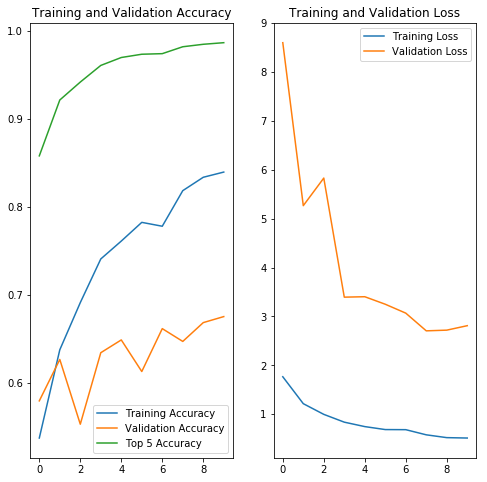

In [11]:
plot_acc_loss_per_epoch(Xception_history, epochs = 10, file_name='images/plus_20_Xception150.png')

In [12]:
Xception_transfer_model.save('models_and_weights/plus_20_Xception_mod150.h5')
Xception_transfer_model.save_weights('models_and_weights/plus_20_weights_X150.h5')

In [18]:
for layer in Xception_transfer_model.layers[:10]:
    layer.trainable = True

In [19]:
print_model_properties(Xception_transfer_model)

Layer 0 | Name: input_1 | Trainable: True
Layer 1 | Name: block1_conv1 | Trainable: True
Layer 2 | Name: block1_conv1_bn | Trainable: True
Layer 3 | Name: block1_conv1_act | Trainable: True
Layer 4 | Name: block1_conv2 | Trainable: True
Layer 5 | Name: block1_conv2_bn | Trainable: True
Layer 6 | Name: block1_conv2_act | Trainable: True
Layer 7 | Name: block2_sepconv1 | Trainable: True
Layer 8 | Name: block2_sepconv1_bn | Trainable: True
Layer 9 | Name: block2_sepconv2_act | Trainable: True
Layer 10 | Name: block2_sepconv2 | Trainable: False
Layer 11 | Name: block2_sepconv2_bn | Trainable: False
Layer 12 | Name: conv2d | Trainable: False
Layer 13 | Name: block2_pool | Trainable: False
Layer 14 | Name: batch_normalization_v1 | Trainable: False
Layer 15 | Name: add | Trainable: False
Layer 16 | Name: block3_sepconv1_act | Trainable: False
Layer 17 | Name: block3_sepconv1 | Trainable: False
Layer 18 | Name: block3_sepconv1_bn | Trainable: False
Layer 19 | Name: block3_sepconv2_act | Traina

In [20]:
Xception_transfer_model.compile(optimizer=Nadam(lr=0.007), loss=['categorical_crossentropy'], metrics=['accuracy', 'top_k_categorical_accuracy'])

Xception_history = Xception_transfer_model.fit(train_generator,
            steps_per_epoch=3034 // 15,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=650 // 16,
            verbose = 1)

Epoch 1/10
202/202 [==============================] - 1993s 10s/step - loss: 0.5969 - accuracy: 0.8152 - top_k_categorical_accuracy: 0.9814 - val_loss: 5.0651 - val_accuracy: 0.5162 - val_top_k_categorical_accuracy: 0.8233
Epoch 2/10
202/202 [==============================] - 2229s 11s/step - loss: 0.5169 - accuracy: 0.8371 - top_k_categorical_accuracy: 0.9862 - val_loss: 3.6781 - val_accuracy: 0.6085 - val_top_k_categorical_accuracy: 0.8775
Epoch 3/10
 98/202 [=============>................] - ETA: 20:00 - loss: 0.4503 - accuracy: 0.8559 - top_k_categorical_accuracy: 0.9918

FileNotFoundError: [Errno 2] No such file or directory: '../images/Images/train/n02097298-Scotch_terrier/n02097298_7639.jpg'

In [18]:
InceptionV3_transfer_model = basic_transfer_model(input_size = (150,150,3), n_categories = 25, trans_model = InceptionV3)
change_trainable_layers(InceptionV3_transfer_model, 310)
InceptionV3_transfer_model.compile(optimizer='Nadam', loss=['categorical_crossentropy'], metrics=['accuracy', 'top_k_categorical_accuracy'])

mdl_check_trans = ModelCheckpoint(filepath='./logs/best_trans_model.hdf5', save_best_only=True)
InceptionV3_history = InceptionV3_transfer_model.fit(train_generator,
            steps_per_epoch=3034 // 15,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=650 // 16,
            verbose = 1)

Epoch 1/10
202/202 [==============================] - 159s 786ms/step - loss: 2.7750 - accuracy: 0.2123 - top_k_categorical_accuracy: 0.5009 - val_loss: 2.2025 - val_accuracy: 0.6125 - val_top_k_categorical_accuracy: 0.8891
Epoch 2/10
202/202 [==============================] - 158s 781ms/step - loss: 2.2918 - accuracy: 0.3431 - top_k_categorical_accuracy: 0.6819 - val_loss: 1.8754 - val_accuracy: 0.7125 - val_top_k_categorical_accuracy: 0.9266
Epoch 3/10
202/202 [==============================] - 149s 740ms/step - loss: 2.1214 - accuracy: 0.3888 - top_k_categorical_accuracy: 0.7220 - val_loss: 2.2178 - val_accuracy: 0.7047 - val_top_k_categorical_accuracy: 0.9344
Epoch 4/10
202/202 [==============================] - 143s 709ms/step - loss: 2.0531 - accuracy: 0.4115 - top_k_categorical_accuracy: 0.7531 - val_loss: 1.9603 - val_accuracy: 0.7281 - val_top_k_categorical_accuracy: 0.9297
Epoch 5/10
202/202 [==============================] - 144s 714ms/step - loss: 1.9780 - accuracy: 0.4329 

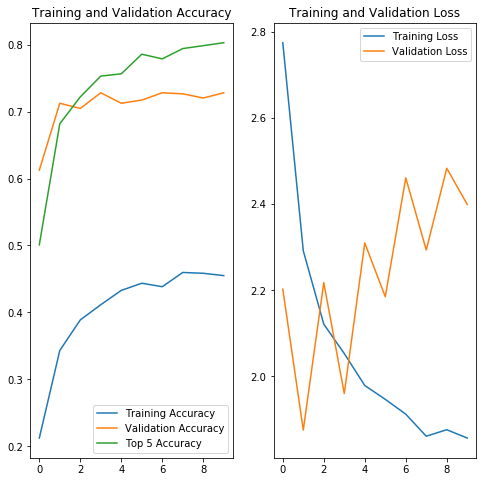

In [20]:
plot_acc_loss_per_epoch(InceptionV3_history, epochs = 10, file_name = 'InceptionV3_compare.png')

In [82]:
!tensorboard --logdir=logs/ --port=8889

TensorBoard 1.14.0a20190301 at http://43a7ce3886b3:8889 (Press CTRL+C to quit)
W0915 23:16:29.180408 140039889069824 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0915 23:16:29.911424 140039889069824 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
^C


In [24]:
inc_preds = InceptionV3_transfer_model.predict(holdout_generator)

np.argmax(inc_preds[0])

16

In [30]:
inc_preds[0]

array([1.6220754e-17, 9.7763575e-10, 5.3520020e-16, 2.0964497e-16,
       1.3748972e-14, 2.8282962e-08, 1.1534963e-11, 1.4274428e-15,
       2.8122736e-14, 8.0800284e-19, 4.7105967e-18, 2.3250473e-19,
       9.6254258e-15, 3.4183937e-17, 8.5636196e-13, 1.0610991e-11,
       1.0000000e+00, 1.0137585e-14, 3.3828705e-20, 2.5195136e-20,
       2.3710295e-13, 1.1103093e-12, 1.3083869e-15, 8.6017626e-28,
       3.9123086e-16], dtype=float32)

In [34]:
metrics = evaluate_model()

In [46]:
!tensorboard --logdir=logs/ --port=8889

TensorBoard 1.14.0a20190301 at http://43a7ce3886b3:8889 (Press CTRL+C to quit)
W0915 21:53:27.774112 139769093265152 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0915 21:53:27.985728 139769093265152 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
^C


In [37]:
basic_cnn_model.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])
mdl_check_trans = ModelCheckpoint(filepath='./logs/best_trans_model.hdf5', save_best_only=True)
basic_cnn_model.fit(train_generator,
            steps_per_epoch=3034 // 15,
            epochs=5,
            validation_data=validation_generator,
            validation_steps=650 // 16,
            verbose = 1,
            callbacks=[tensorboard, early_stopping])

Epoch 1/5
202/202 [==============================] - 53s 264ms/step - loss: 3.2244 - accuracy: 0.0437 - val_loss: 3.2141 - val_accuracy: 0.0656
Epoch 2/5
202/202 [==============================] - 55s 274ms/step - loss: 3.2064 - accuracy: 0.0620 - val_loss: 3.2024 - val_accuracy: 0.0766
Epoch 3/5
202/202 [==============================] - 51s 254ms/step - loss: 3.2005 - accuracy: 0.0688 - val_loss: 3.1709 - val_accuracy: 0.0812
Epoch 4/5
202/202 [==============================] - 54s 267ms/step - loss: 3.1979 - accuracy: 0.0639 - val_loss: 3.1539 - val_accuracy: 0.0766
Epoch 5/5
202/202 [==============================] - 53s 262ms/step - loss: 3.1791 - accuracy: 0.0719 - val_loss: 3.1449 - val_accuracy: 0.0797


In [38]:
test_predictions = basic_cnn_model.predict(holdout_generator)

In [45]:
basic_cnn_model.load_weights('first_try_25.h5')

NameError: name 'basic_cnn_model' is not defined